In [1]:
!kaggle datasets list -s "Telco"
!kaggle datasets download -d "blastchar/telco-customer-churn"

'kaggle' is not recognized as an internal or external command,
operable program or batch file.
'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [61]:
import os
os.getcwd()
# os.chdir(default_path)

'C:\\Users\\hanjh\\Desktop\\Kaggle project\\Customer_Churn'

In [63]:
import zipfile 
with zipfile.ZipFile("telco-customer-churn.zip", 'r') as file:
    file.extractall('churn')
os.listdir('churn')

['WA_Fn-UseC_-Telco-Customer-Churn.csv']

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ParameterGrid, RepeatedKFold, StratifiedKFold, RepeatedStratifiedKFold, StratifiedKFold
from iterstrat.ml_stratifiers import RepeatedMultilabelStratifiedKFold
from sklearn.feature_selection import RFECV, VarianceThreshold, SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, mean_squared_error, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelBinarizer, label_binarize
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline as Pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from summarytools import dfSummary
from sklearn.metrics import roc_auc_score, RocCurveDisplay, precision_recall_curve
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import colorama
from colorama import Fore, Style  # maakes strings colored
# !pip3 install termcolor
from termcolor import colored

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings(action='ignore')

# **Preface**

Churn analysis is the evaluation of a company’s customer loss rate in order to reduce it. Also referred to as customer attrition rate, churn can be minimized by assessing your product and how people use it. In fact, acquiring new customers is considerably more expensive than maintaining and upgrading existing customer relationships. 

In this Exploratory Data Analysis (EDA) and and a variety of Model Classifications including Logistic Regression (LR), Support Vector Machine (SVM)CatdaBoostingCatAB), Random Forest (RF)T), XGBoost (XG and LightGBMB), this study will examine the dataset named as "Telco Customer Churn" under the 'WAFn-UseC-Telco-Customer-Churn.csv' file  Kaggle website <br/>  
*Dataset Link : https://www.kaggle.com/datasets/blastchar/telco-customer-churn*ng.


# 1. Exploratory Data Analysis
## Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

**About the data:**

- Customers who left within the last month – the column is called Churn

- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device 
protection, tech support, and streaming TV and movies

- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

- Demographic info about customers – gender, age range, and if they have partners and dependents Inspiration

##### 21 Variables, 7043 Observation

<br/> 

**About the Features:**

* CustomerId: Customer ID
* Gender: Gender
* SeniorCitizen: Whether the customer is elderly (1, 0)
* Partner: Whether the client has a partner (Yes, No)
* Dependents: Whether the client has dependents (Yes, No)
* tenure: Number of months the client stays with the company
* PhoneService: Whether the customer has telephone service (Yes, No)
* MultipleLines: Whether the customer has more than one line (Yes, No, No phone service)
* InternetService: Customer's internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security (Yes, No, No internet service)
* OnlineBackup: Whether the customer has an online backup (Yes, No, No internet service)
* DeviceProtection: Whether the customer has device protection (Yes, No, No internet service)
* TechSupport: Whether the customer receives technical support (Yes, No, No internet service)
* StreamingTV: Whether the customer has a TV broadcast (Yes, No, No internet service)
* StreamingMovies: Whether the customer has movie streaming (Yes, No, No internet service)
* Contract: Client's contract duration (Month-to-month, One year, Two year)
* PaperlessBilling: Whether the customer has a paperless invoice (Yes, No)
* PaymentMethod: Customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges: Amount collected from the customer on a monthly basis
* TotalCharges: Total amount collected from the customer
* Churn: Whether the customer uses it or not (Yes or No)


In [65]:
df = pd.read_csv("churn\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [67]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [69]:
df.info() # Total Charges Variables 'object' type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [71]:
# Change Object data type to Numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"] 
                                     , errors= "coerce")

In [73]:
df["TotalCharges"] , df["TotalCharges"].dtype

(0         29.85
 1       1889.50
 2        108.15
 3       1840.75
 4        151.65
          ...   
 7038    1990.50
 7039    7362.90
 7040     346.45
 7041     306.60
 7042    6844.50
 Name: TotalCharges, Length: 7043, dtype: float64,
 dtype('float64'))

In [74]:
display(df.isnull().sum()) #TotalCharges has 11 missing values.
df.query('TotalCharges.isnull()',engine='python') 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [75]:
df.dropna(inplace=True , axis= 0) # Drop 11 rows that has missing TotalCharges
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Churn
No     5163
Yes    1869
Name: count, dtype: int64

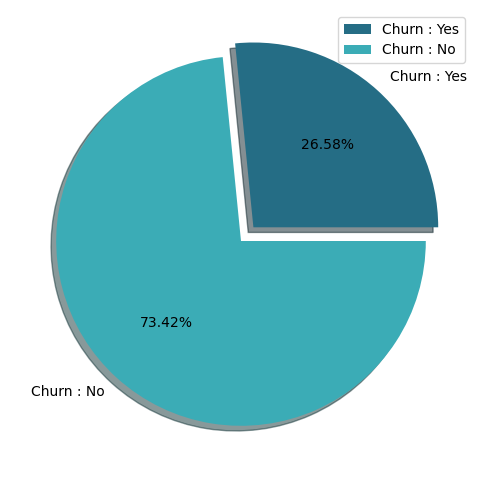

In [154]:
display(df["Churn"].value_counts()) # Imbalanced Dataset
plt.figure(figsize= (10, 6))
data_pie  = [1869 , 5163]
labels = ["Churn : Yes", "Churn : No"]
explode = [0.1, 0]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#256D85', '#3BACB6'])
plt.legend()
plt.show()

In [77]:
# Check unique values in each column
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Unique Values of {col} Column:")
    print(unique_vals)
    print()

Unique Values of customerID Column:
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique Values of gender Column:
['Female' 'Male']

Unique Values of SeniorCitizen Column:
[0 1]

Unique Values of Partner Column:
['Yes' 'No']

Unique Values of Dependents Column:
['No' 'Yes']

Unique Values of tenure Column:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]

Unique Values of PhoneService Column:
['No' 'Yes']

Unique Values of MultipleLines Column:
['No phone service' 'No' 'Yes']

Unique Values of InternetService Column:
['DSL' 'Fiber optic' 'No']

Unique Values of OnlineSecurity Column:
['No' 'Yes' 'No internet service']

Unique Values of OnlineBackup Column:
['Yes' 'No' 'No internet service']

Unique Values of DeviceProtection Column:
['No' 'Yes' 'No internet service']

Unique Val

In [78]:
df.describe([0, 0.30, 0.50, 0.95, 0.99, 1]).T

,count,mean,std,min,0%,30%,50%,95%,99%,100%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.00,0.000,0.000,1.0000,1.0000,1.00,1.00
tenure,7032.0,32.421786,24.545260,1.00,1.00,12.000,29.000,72.0000,72.0000,72.00,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,18.25,45.900,70.350,107.4225,114.7345,118.75,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,18.80,551.995,1397.475,6923.5900,8039.8830,8684.80,8684.80


In [79]:
df.drop('customerID' , axis= 1 , inplace=True)

In [80]:
df["Churn"].replace(to_replace="Yes", value= 1 , inplace= True)
df["Churn"].replace(to_replace="No", value= 0 , inplace= True)
df["Churn"].dtype

dtype('int64')

In [81]:
df_dummy_encoded = pd.get_dummies(df)
df_dummy_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


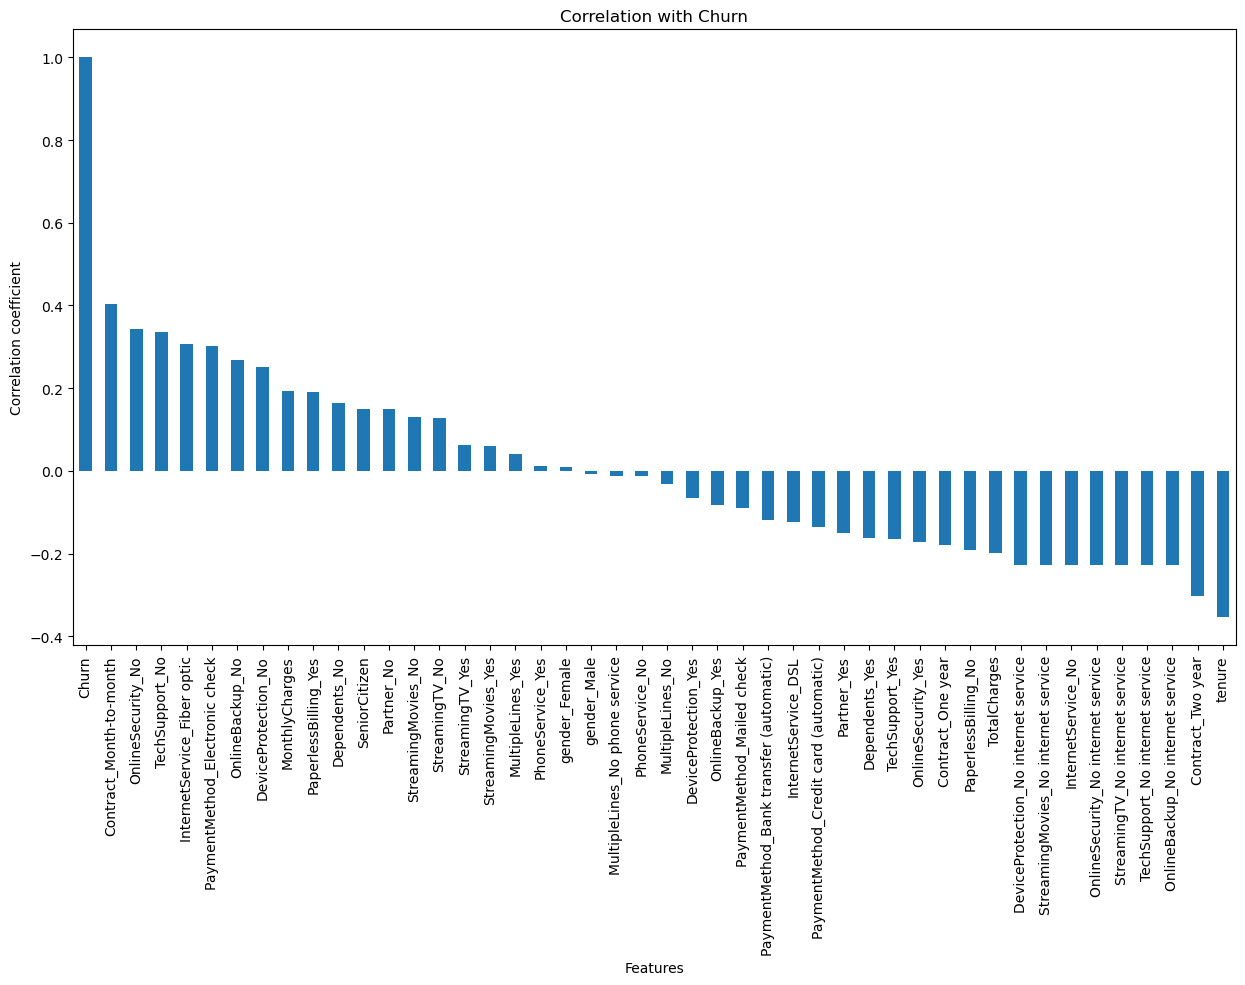

In [97]:
plt.figure(figsize=(15,8))
df_dummy_encoded.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.title('Correlation with Churn')
plt.xlabel('Features')
plt.ylabel('Correlation coefficient')
plt.show()

*Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. 
While, tenure, two year contracts seem to be negatively correlated with churn.*

**MultipleLines, PhoneService, Gender Streaming Movies display low relation with Churn**

In [99]:
df["Churn"].replace(to_replace=1, value= "Yes" , inplace= True)
df["Churn"].replace(to_replace=0, value= "No" , inplace= True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = df.copy(deep = True)
text_data_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [100]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization
df1['tenure'] = mms.fit_transform(df1[['tenure']])
df1['MonthlyCharges'] = mms.fit_transform(df1[['MonthlyCharges']])
df1['TotalCharges'] = mms.fit_transform(df1[['TotalCharges']])
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.619718,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


# 2. Feature Selection 
### for Categorical Features
- Chi-Squared Test (Best suited for categorical features)
  - Interpretation:
    - **High Chi-squared score:** Indicates a strong association between the feature and the target variable.
    - **Low Chi-squared score:** Indicates a weak or no association between the feature and the target variable.
### for Numerical Features:
- ANOVA Test (Best suited for numerical features)
  - Interpretation:
    - **High F-value:** Indicates a significant difference between group means, suggesting that the feature is important.
    - **Low F-value:** Indicates little difference between group means, suggesting that the feature is not important.

In [102]:
col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


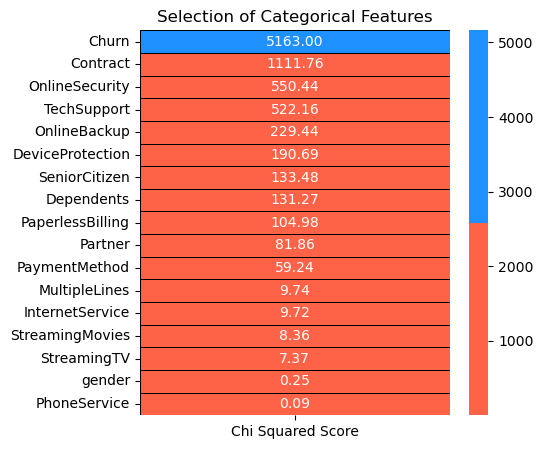

In [103]:
colors=['tomato','dodgerblue']
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif
features = df1.loc[:,categorical_features]
target = df1.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

***PhoneService, gender, StreamingTV, StreamingMovies, MultipleLines and InternetService display a very low relation with Churn.***

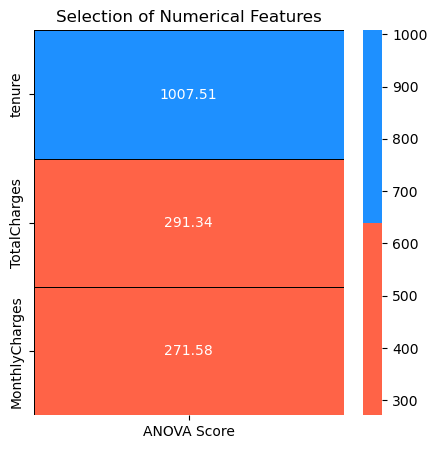

In [105]:
from sklearn.feature_selection import f_classif
features = df1.loc[:,numerical_features]
target = df1.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

***According to the ANOVA test, higher the value of the ANOVA score, higher the importance of the feature.***

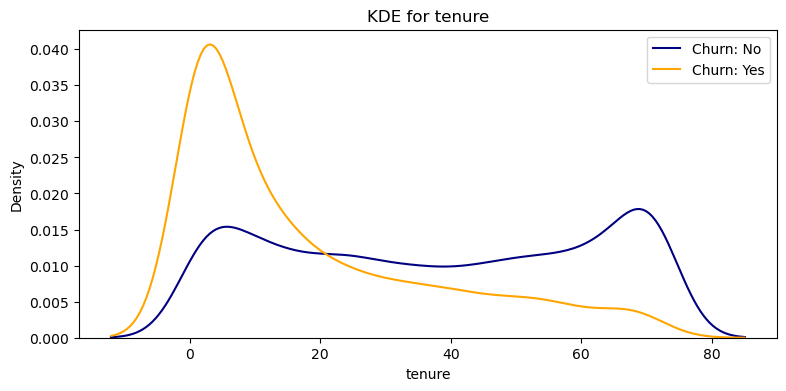

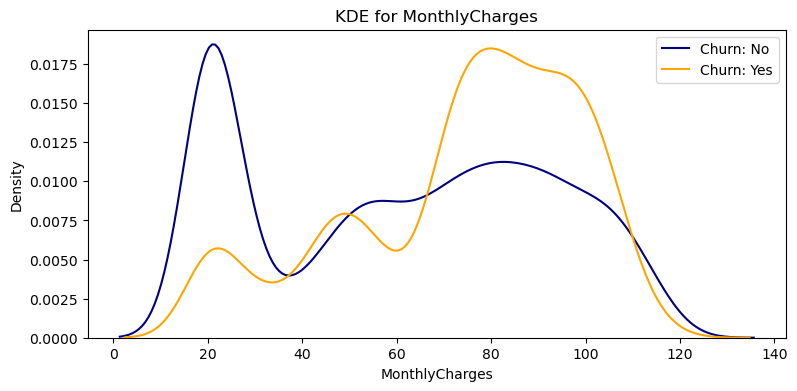

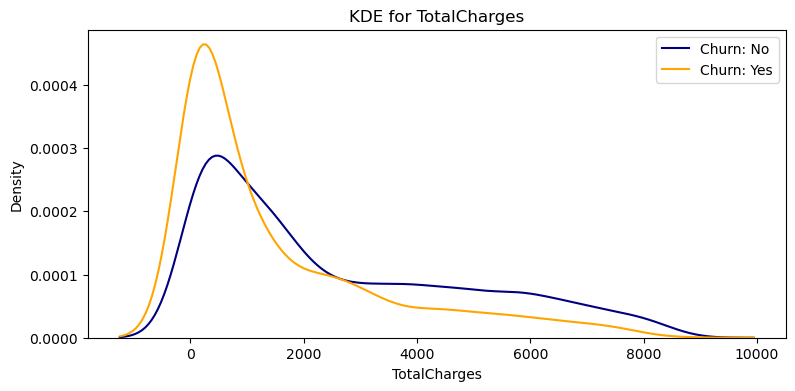

In [107]:
df["Churn"].replace(to_replace=1, value= "Yes" , inplace= True)
df["Churn"].replace(to_replace=0, value= "No" , inplace= True)
df["Churn"].dtype

def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
    plt.legend()
    
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

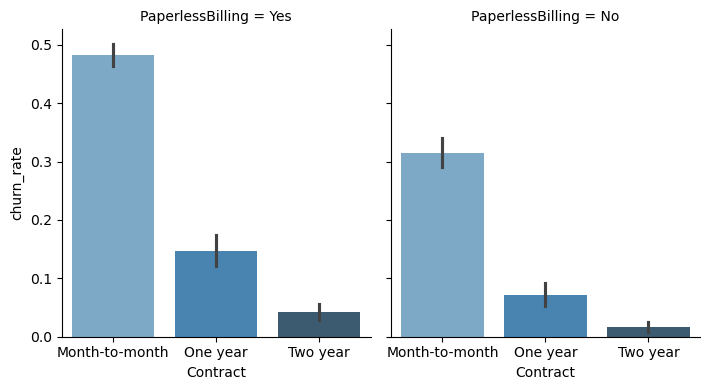

In [108]:
df['churn_rate'] = df['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(df, col="PaperlessBilling", height=4, aspect=.9)
ax = g.map(sns.barplot, "Contract", "churn_rate", palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'])

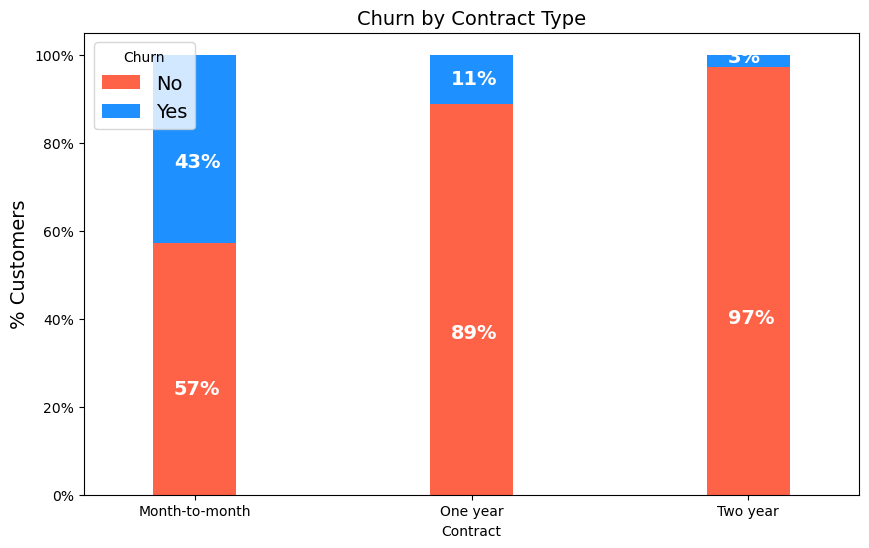

In [109]:
import matplotlib.ticker as mtick
colors=['tomato','dodgerblue']
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

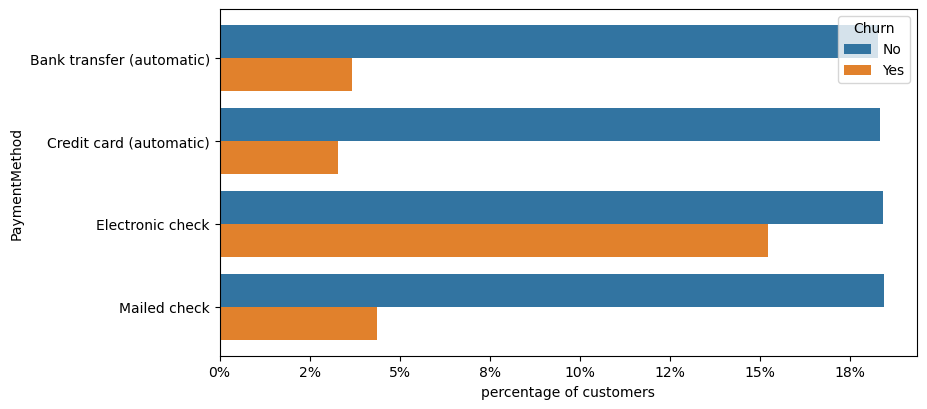

In [110]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["Churn"].value_counts().to_frame(name=axis_name).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
plt.figure(figsize=(9, 4.5))
barplot_percentages("PaymentMethod", orient='h')

# 3. Feature Engineering

*From the above results, we need to **include all the numerical features** for modeling and **drop PhoneService, gender, StreamingTV, StreamingMovies, MultipleLines and InternetService***

In [112]:
final_df=df.copy(deep=True)
final_df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
final_df['Churn'].replace(to_replace='No', value=0, inplace=True)
final_df.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService','churn_rate'],inplace = True)
final_dummies=pd.get_dummies(final_df)

In [113]:
final_dummies.insert(len(final_dummies.columns)-1, 'Churn', final_dummies.pop('Churn'))
final_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.85,False,True,True,False,True,False,...,True,False,False,False,True,False,False,True,False,0
1,0,34,56.95,1889.50,True,False,True,False,False,False,...,False,True,False,True,False,False,False,False,True,0
2,0,2,53.85,108.15,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,True,1
3,0,45,42.30,1840.75,True,False,True,False,False,False,...,False,True,False,True,False,True,False,False,False,0
4,0,2,70.70,151.65,True,False,True,False,True,False,...,True,False,False,False,True,False,False,True,False,1


***We will now move onto data balancing!***

- Sampling techniques such as Undersampling and Oversampling are standard methods for dealing with class imbalance.

1. Undersampling : removing examples from the majority class to make the class proportions more balanced.
(For undersampling technique, there is a **RandomUnderSampler** algorithm, which randomly removes instances)

2. Oversampling : over-sampling involves generating new examples for the minority class to increase its representation in the dataset.
(For oversampling, we will use **SMOTE**, which is a widely used technique in classification problems where the minority class is significantly smaller than the majority class. The technique works by selecting an example from the minority class and finding its k nearest neighbors. It then creates new synthetic examples by randomly interpolating the attributes of the selected examples and adding them to the dataset.)

- We will apply oversampling technique on this dataset by using SMOTE! and this is the benefits of using SMOTE.

    - Using SMOTE (Synthetic Minority Over-sampling Technique) can improve the performance of your model, particularly in terms of metrics like accuracy and F1-score, when dealing with imbalanced datasets.

    - How SMOTE Helps:
        - Balancing Classes: SMOTE generates synthetic samples for the minority class, balancing the class distribution in the training set. This helps the model to learn better from both classes, rather than being biased towards the majority class.
        - Improved Generalization: By having a more balanced training set, the model can generalize better, leading to improved performance on the test set.

In [115]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

X = final_dummies.drop('Churn', axis=1)
y = final_dummies['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 12)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
Counter(y_train_resampled)

Counter({0: 4101, 1: 4101})

In [129]:
def model_smote(classifier,x_train,y_train,x_test,y_test):
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score with SMOTE : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score with SMOTE : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    RocCurveDisplay.from_estimator(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot with SMOTE')
    plt.show()

def model(classifier,x_train,y_train,x_test,y_test):
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    RocCurveDisplay.from_estimator(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

Cross Validation Score with SMOTE :  91.43%
ROC_AUC Score with SMOTE :  73.15%


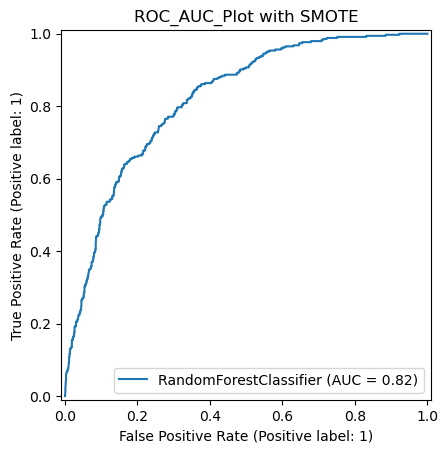

Cross Validation Score :  84.27%
ROC_AUC Score :  68.70%


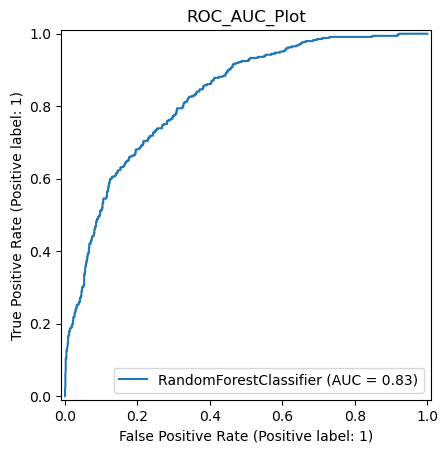

In [131]:
classifier_rf = RandomForestClassifier(max_depth=5, random_state=0)
model_smote(classifier_rf, X_train_resampled, y_train_resampled, X_test, y_test)
model(classifier_rf, X_train, y_train, X_test, y_test)

# 4. Modeling
- Logistic Regression
- RandomForest Classifier
- Suppoer Vector Machine (SVM)
- XGBoost
- LightGBM
- CatBoostke worse predictions.

## How Boosting Algorithm (XGBoost & LightGBM & Catboost) Deal Imbalanced Data?
CatBoost, XGBoost and LightGBM can deal imbalanced data internally and in general, they do good job even on imbalanced data..
They produce good results on the imbalanced daata by giving an opportunity to focus more on the minority class and accordingly tune the training algorithm CatBoost, XGBoost and LightGBM use <br/> **scale_pos_weight** hyperparameter to tune the training algorithm for the imbalanced data. 

scale_pos_weight is 1 by default. Both major class and minority class get the same weight.

When dealing with imbalanced data, story changes a bit. Scale_pos_weight gets the number of ( total number of examples in the majority class divided by the total number of examples in the minority class.)

For example, in our data;

- Number of Non-churned customer: 5174
- Number of Churned customer: 1869
- scale_pos_weight should get 5174 / 1869 which is almost 3
- By adjusting the weight, minority class gets **3 times more impact** and 3 times more correction than errors made on the majority class.

***Note that if we use extreme values for the scale_pos_weight, we can overfit the minority class and model could make worse predictions.***

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 12)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
Counter(y_train_resampled)

Counter({0: 4101, 1: 4101})

### 4-1) Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('scalar', StandardScaler()),
    ('logreg', LogisticRegression())
])

param_grid = {
    'logreg__C':[0.1,1,10],
    'logreg__penalty':['l1','l2'],
    'logreg__solver':['liblinear','saga']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
y_pred = grid_search.predict(X_test)
# Print the prediction accuracy
print("Test set score: ", metrics.accuracy_score(y_test, y_pred))

accuracy= []
recall =[]
roc_auc= []
precision = []

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['Logistic Regression']
result_df_logreg = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df_logreg

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters found:  {'logreg__C': 0.1, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Best cross-validation score:  0.8001706900755913
Test set score:  0.7882018479033405


,Accuracy,Recall,Roc_Auc,Precision
Logistic Regression,0.7882,0.6,0.7247,0.564


In [44]:
best_logistic = grid_search.best_estimator_
best_logreg = best_logistic.named_steps['logreg']
coefficients = best_logreg.coef_
intercept = best_logreg.intercept_

Axes(0.125,0.11;0.775x0.77)


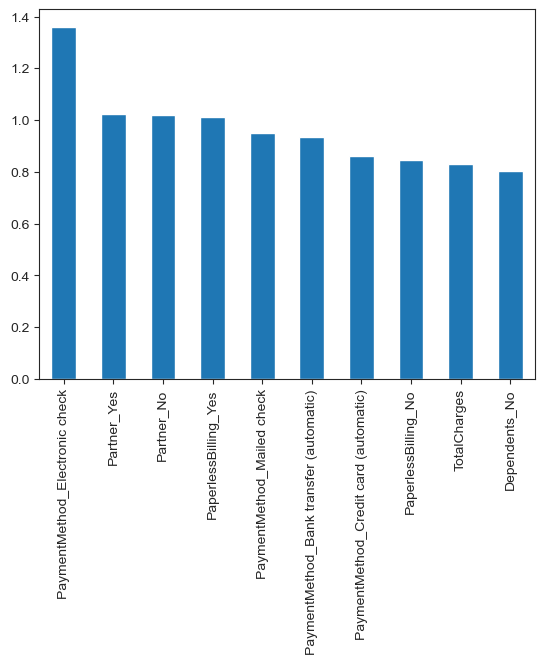

In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("ticks")
weights = pd.Series(coefficients[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


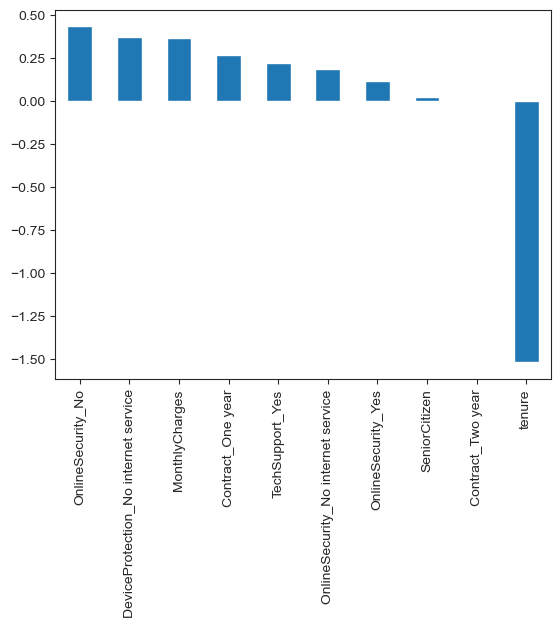

In [46]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

### 4-2) Random Forest Classifier

In [123]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

param_grid ={
    'rf__n_estimators' : [100, 300, 500, 1000],
    'rf__max_depth' : [5, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf' : [2, 4, 10],
    'rf__bootstrap': [True, False]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Test the model on the test set
test_score = grid_search.score(X_test, y_test)
print("Test set score: ", test_score)

y_pred = grid_search.predict(X_test)

accuracy= []
recall =[]
roc_auc= []
precision = []

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['Random Forest']
result_df_rf = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df_rf

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters found:  {'rf__bootstrap': True, 'rf__max_depth': 10, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
Best cross-validation score:  0.8230919287978541
Test set score:  0.8227488151658767


,Accuracy,Recall,Roc_Auc,Precision
Random Forest,0.8227,0.7219,0.7906,0.6501


<Axes: >

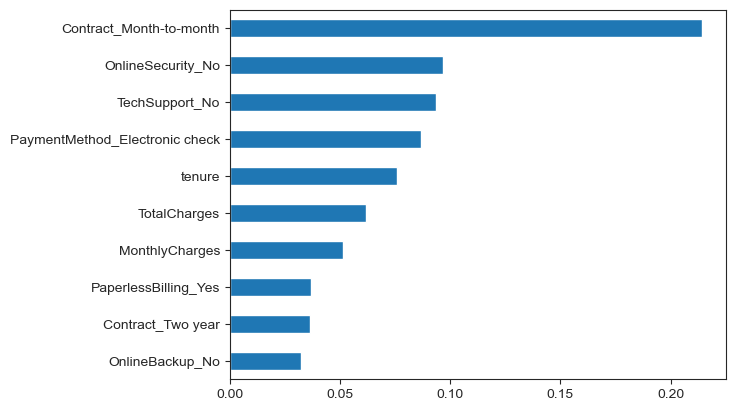

In [124]:
# Get the best estimator
best_model = grid_search.best_estimator_
best_rf = best_model.named_steps['rf']

# Get feature importances
feature_importances = best_rf.feature_importances_
# print("Feature importances: ", feature_importances)

weights = pd.Series(feature_importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

### 4-3) Suppoer Vector Machine (SVM)

In [51]:
from sklearn.svm import SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [1, 0.1, 0.01, 0.001],
    'svm__kernel': ['linear', 'rbf']
}
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)
print("Best cross-validation score: ", grid_search.best_score_)
# Test the model on the test set
test_score = grid_search.score(X_test, y_test)
print("Test set score: ", test_score)

y_pred = grid_search.predict(X_test)

accuracy= []
recall =[]
roc_auc= []
precision = []

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['SVM']
result_df_svm = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df_svm

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best cross-validation score:  0.8007802974884175
Test set score:  0.7931769722814499


,Accuracy,Recall,Roc_Auc,Precision
SVM,0.7932,0.571,0.7182,0.5794


In [52]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test, y_pred))

[[919 143]
 [148 197]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1062
           1       0.58      0.57      0.58       345

    accuracy                           0.79      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.79      0.79      0.79      1407



### 4-4) CatBoost

In [54]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
preprocessor = StandardScaler() 
catboost_clf = CatBoostClassifier(verbose=0)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('catboost', catboost_clf)
])

param_grid = {
    'catboost__depth': [4, 6, 8],
    'catboost__learning_rate': [0.1, 0.01],
    'catboost__iterations': [100, 200],
    'catboost__l2_leaf_reg': [1, 3, 5],
    'catboost__scale_pos_weight': [3]
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

accuracy= []
recall =[]
roc_auc= []
precision = []

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['Catboost_adjusted_weight_3']
result_df_cat = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df_cat

,Accuracy,Recall,Roc_Auc,Precision
Catboost_adjusted_weight_3,0.755,0.7094,0.7405,0.5293


In [55]:
print("Best parameters found: ", grid_search.best_params_)
best_clf = grid_search.best_estimator_
test_score = best_clf.score(X_test, y_test)
print("Test set score with best estimator: ", test_score)

Best parameters found:  {'catboost__depth': 8, 'catboost__iterations': 200, 'catboost__l2_leaf_reg': 1, 'catboost__learning_rate': 0.1, 'catboost__scale_pos_weight': 3}
Test set score with best estimator:  0.7549763033175355


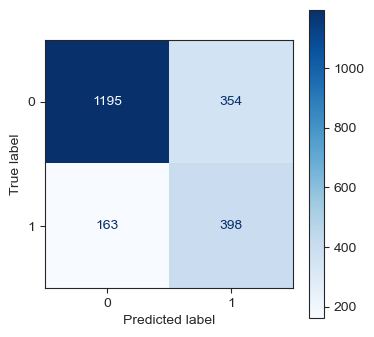

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 4))
cm_display = ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_,X_test,y_test, cmap='Blues', ax=ax)
print(cm_display)

### 4-5) XGBoost (with adjusted Scale_pos_weight =3)

In [58]:
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
preprocessor = StandardScaler() 
xgb_clf = XGBClassifier(verbose=False)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', xgb_clf)
])

param_grid = {
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.1, 0.01],
    'xgb__n_estimators': [100, 200, 500],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0],
    'xgb__scale_pos_weight': [3]
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

accuracy= []
recall =[]
roc_auc= []
precision = []

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['XGBoost_adjusted_weight_3']
result_df_xgb = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df_xgb

,Accuracy,Recall,Roc_Auc,Precision
XGBoost_adjusted_weight_3,0.7436,0.6542,0.7151,0.514


In [59]:
print("Best parameters found: ", grid_search.best_params_)
best_clf = grid_search.best_estimator_
test_score = best_clf.score(X_test, y_test)
print("Test set score with best estimator: ", test_score)

Best parameters found:  {'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 200, 'xgb__scale_pos_weight': 3, 'xgb__subsample': 0.8}
Test set score with best estimator:  0.7436018957345971


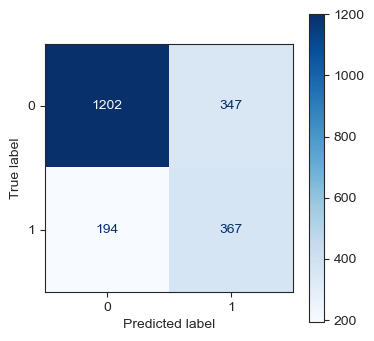

In [60]:
fig, ax = plt.subplots(figsize=(4, 4))
cm_display = ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_,X_test,y_test, cmap='Blues', ax=ax)
print(cm_display)

### 4-6) LightGBM

In [62]:
from lightgbm import LGBMClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
preprocessor = StandardScaler() 
lgbm_clf = LGBMClassifier(verbose=-1)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('lgbm', lgbm_clf)
])

param_grid = {
    'lgbm__max_depth': [3, 5, 7],
    'lgbm__learning_rate': [0.1, 0.01],
    'lgbm__n_estimators': [100, 200],
    'lgbm__subsample': [0.8, 1.0],
    'lgbm__colsample_bytree': [0.8, 1.0],
    'lgbm__scale_pos_weight': [3]
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

accuracy= []
recall =[]
roc_auc= []
precision = []

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['LightGBM_adjusted_weight_3']
result_df_lgbm = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df_lgbm

,Accuracy,Recall,Roc_Auc,Precision
LightGBM_adjusted_weight_3,0.7725,0.6827,0.7439,0.5591


In [63]:
print("Best parameters found: ", grid_search.best_params_)
best_clf = grid_search.best_estimator_
test_score = best_clf.score(X_test, y_test)
print("Test set score with best estimator: ", test_score)

Best parameters found:  {'lgbm__colsample_bytree': 0.8, 'lgbm__learning_rate': 0.01, 'lgbm__max_depth': 5, 'lgbm__n_estimators': 100, 'lgbm__scale_pos_weight': 3, 'lgbm__subsample': 0.8}
Test set score with best estimator:  0.7725118483412322


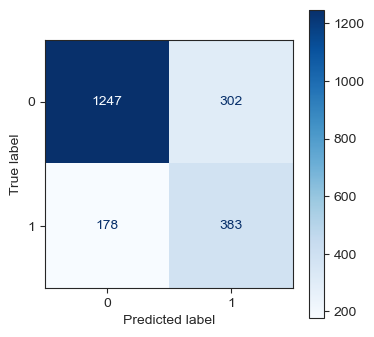

In [64]:
fig, ax = plt.subplots(figsize=(4, 4))
cm_display = ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_,X_test,y_test, cmap='Blues', ax=ax)
print(cm_display)

### 5) Model Comparison

Based on Four performance metrics (Accuracy, Recall, ROC_AUC, Precision), **Random Forest** outperform rest of 5 models.

In [133]:
df_list =[result_df_logreg, result_df_rf, result_df_svm, result_df_cat, result_df_xgb, result_df_lgbm]
for df in df_list:
    print(df)
    print('-------------------------------------------------------------------------------')

                     Accuracy  Recall  Roc_Auc  Precision
Logistic Regression    0.7882     0.6   0.7247      0.564
-------------------------------------------------------------------------------
               Accuracy  Recall  Roc_Auc  Precision
Random Forest    0.8227  0.7219   0.7906     0.6501
-------------------------------------------------------------------------------
     Accuracy  Recall  Roc_Auc  Precision
SVM    0.7932   0.571   0.7182     0.5794
-------------------------------------------------------------------------------
                            Accuracy  Recall  Roc_Auc  Precision
Catboost_adjusted_weight_3     0.755  0.7094   0.7405     0.5293
-------------------------------------------------------------------------------
                           Accuracy  Recall  Roc_Auc  Precision
XGBoost_adjusted_weight_3    0.7436  0.6542   0.7151      0.514
-------------------------------------------------------------------------------
                            Accuracy  

### 6) Validation

In order to see how Imbalanced data can significantly affect the performance of machine learning models, especially in classification tasks,<br>
we will implement Random Forest Classifier again **without** using SMOTE technique and make a comparsion.

In [127]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

param_grid ={
    'rf__n_estimators' : [100, 300, 500],
    'rf__max_depth' : [5, 10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf' : [2, 4, 10],
    'rf__bootstrap': [True, False]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Test the model on the test set
test_score = grid_search.score(X_test, y_test)
print("Test set score: ", test_score)

y_pred = grid_search.predict(X_test)

accuracy= []
recall =[]
roc_auc= []
precision = []

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['Random Forest_NO_SMOTE']
result_df_rf_no_SMOTE = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'rf__bootstrap': True, 'rf__max_depth': 10, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Best cross-validation score:  0.8037410264413429
Test set score:  0.8009478672985783


In [131]:
display(result_df_rf)
display(result_df_rf_no_SMOTE)

,Accuracy,Recall,Roc_Auc,Precision
Random Forest,0.8227,0.7219,0.7906,0.6501


,Accuracy,Recall,Roc_Auc,Precision
Random Forest_NO_SMOTE,0.8009,0.5098,0.7081,0.6636
